In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Data Cleaning

In [2]:
# First dataset to clean is the price_demand_data.
# Categorise PRICECATEGORY to extract the maximum value for groupby later.
pc = pd.CategoricalDtype(categories = ["LOW","MEDIUM","HIGH","EXTREME"], ordered=True)

# Unify date formate for both datasets to merge later.
df1 = pd.read_csv('price_demand_data.csv', 
    dtype = {'PRICECATEGORY': pc},
    parse_dates=['SETTLEMENTDATE'], dayfirst=True)
df1['Date'] = df1['SETTLEMENTDATE'].dt.date

# Second dataset is the weather_data.
df2 = pd.read_csv('weather_data.csv',
    index_col = 'Date', parse_dates=['Date'], dayfirst=True)

# Select maximum value as the daily energy demand
max_demand = df1.groupby('Date').agg({'TOTALDEMAND': "max", 'PRICECATEGORY': "max"})

# Merge two datasets.
df_new = pd.merge(max_demand, df2, left_index=True, right_index=True)

df_new

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2021-01-02,4964.35,LOW,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2021-01-03,4503.31,LOW,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
2021-01-04,4764.18,LOW,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
2021-01-05,4800.64,LOW,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,6769.89,EXTREME,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
2021-08-28,5716.32,MEDIUM,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
2021-08-29,6227.89,EXTREME,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4


In [3]:
# Noticed in 9am & 3pm Wind speed column has non-numeric data 'Calm'
df_new.replace(to_replace = 'Calm', value = 0)
df_new

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2021-01-02,4964.35,LOW,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2021-01-03,4503.31,LOW,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
2021-01-04,4764.18,LOW,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
2021-01-05,4800.64,LOW,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,6769.89,EXTREME,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
2021-08-28,5716.32,MEDIUM,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
2021-08-29,6227.89,EXTREME,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4


In [4]:
# Determin null values in the new merged dataset
df_new.isnull().sum()

TOTALDEMAND                          0
PRICECATEGORY                        0
Minimum temperature (°C)             1
Maximum temperature (°C)             1
Rainfall (mm)                        2
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       3
Speed of maximum wind gust (km/h)    3
Time of maximum wind gust            3
9am Temperature (°C)                 1
9am relative humidity (%)            1
9am cloud amount (oktas)             0
9am wind direction                   1
9am wind speed (km/h)                1
9am MSL pressure (hPa)               2
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             1
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               1
dtype: int64

In [6]:
# convert time in "hh:mm" format to number of minutes
def time(timestring):
    if type(timestring) == str and ':' in timestring:
        hour, minute = str(timestring).split(':')
        return int(hour)*60 + int(minute)

df_new['Time of maximum wind gust'] = df_new['Time of maximum wind gust'].apply(time)
df_new

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,31.0,794.0,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
2021-01-02,4964.35,LOW,18.4,29.0,0.0,9.4,1.3,NNW,30.0,502.0,...,7,NNW,17,1013.300000,28.7,38,7.0,SW,4,1008.5
2021-01-03,4503.31,LOW,17.0,26.2,12.6,4.8,7.1,WSW,33.0,1075.0,...,8,WSW,4,1007.700000,23.5,59,4.0,SSW,2,1005.2
2021-01-04,4764.18,LOW,16.0,18.6,2.6,3.8,0.0,SSE,41.0,963.0,...,8,SSE,11,1010.000000,18.2,82,8.0,SSW,17,1011.0
2021-01-05,4800.64,LOW,15.9,19.1,11.2,1.0,0.0,SSE,35.0,662.0,...,8,SSE,13,1012.500000,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,6769.89,EXTREME,4.6,13.6,0.0,1.2,3.8,SSW,15.0,738.0,...,7,,Calm,1020.000000,12.8,65,7.0,SSE,7,1017.4
2021-08-28,5716.32,MEDIUM,5.3,17.8,0.0,1.6,9.6,N,39.0,794.0,...,1,N,7,1018.600000,17.4,31,3.0,NNW,24,1013.5
2021-08-29,6227.89,EXTREME,9.1,16.2,0.6,6.4,4.3,NNE,33.0,110.0,...,7,N,13,1011.400000,12.8,84,7.0,S,6,1010.4


In [5]:
# Fill in some NaN value
df_new = df_new.fillna(df_new.mean())
df_new

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
2021-01-02,4964.35,LOW,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,...,7,NNW,17,1013.300000,28.7,38,7.0,SW,4,1008.5
2021-01-03,4503.31,LOW,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,...,8,WSW,4,1007.700000,23.5,59,4.0,SSW,2,1005.2
2021-01-04,4764.18,LOW,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,...,8,SSE,11,1010.000000,18.2,82,8.0,SSW,17,1011.0
2021-01-05,4800.64,LOW,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,...,8,SSE,13,1012.500000,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,6769.89,EXTREME,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,...,7,,Calm,1020.000000,12.8,65,7.0,SSE,7,1017.4
2021-08-28,5716.32,MEDIUM,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,...,1,N,7,1018.600000,17.4,31,3.0,NNW,24,1013.5
2021-08-29,6227.89,EXTREME,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,...,7,N,13,1011.400000,12.8,84,7.0,S,6,1010.4


In [7]:
# Check NaN value again
df_new.isnull().sum()

TOTALDEMAND                          0
PRICECATEGORY                        0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       3
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            3
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   1
9am wind speed (km/h)                1
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

In [8]:
# Fill in remaining NaN by Imputation
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit(df_new)
SimpleImputer(strategy='most_frequent')
imp_mode.transform(df_new)

df_new[:] = SimpleImputer(strategy='most_frequent').fit_transform(df_new)
df_new

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,31.0,794.0,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
2021-01-02,4964.35,LOW,18.4,29.0,0.0,9.4,1.3,NNW,30.0,502.0,...,7,NNW,17,1013.300000,28.7,38,7.0,SW,4,1008.5
2021-01-03,4503.31,LOW,17.0,26.2,12.6,4.8,7.1,WSW,33.0,1075.0,...,8,WSW,4,1007.700000,23.5,59,4.0,SSW,2,1005.2
2021-01-04,4764.18,LOW,16.0,18.6,2.6,3.8,0.0,SSE,41.0,963.0,...,8,SSE,11,1010.000000,18.2,82,8.0,SSW,17,1011.0
2021-01-05,4800.64,LOW,15.9,19.1,11.2,1.0,0.0,SSE,35.0,662.0,...,8,SSE,13,1012.500000,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,6769.89,EXTREME,4.6,13.6,0.0,1.2,3.8,SSW,15.0,738.0,...,7,,Calm,1020.000000,12.8,65,7.0,SSE,7,1017.4
2021-08-28,5716.32,MEDIUM,5.3,17.8,0.0,1.6,9.6,N,39.0,794.0,...,1,N,7,1018.600000,17.4,31,3.0,NNW,24,1013.5
2021-08-29,6227.89,EXTREME,9.1,16.2,0.6,6.4,4.3,NNE,33.0,110.0,...,7,N,13,1011.400000,12.8,84,7.0,S,6,1010.4


In [9]:
# Double check for NaN value
df_new.isnull().sum()

TOTALDEMAND                          0
PRICECATEGORY                        0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

### Data Exploration

In [10]:
# Identify Pearson correlation
df_pc = df_new.corr(method='pearson')

In [11]:
print("Pearson correlation is:")
print(df_pc['TOTALDEMAND'].abs().sort_values(ascending=False))
print()

Pearson correlation is:
TOTALDEMAND                          1.000000
Minimum temperature (°C)             0.488244
9am Temperature (°C)                 0.390843
3pm Temperature (°C)                 0.325252
Maximum temperature (°C)             0.290004
Evaporation (mm)                     0.264008
Time of maximum wind gust            0.177856
9am cloud amount (oktas)             0.167373
Sunshine (hours)                     0.139581
9am relative humidity (%)            0.103267
Speed of maximum wind gust (km/h)    0.081024
Rainfall (mm)                        0.072715
3pm cloud amount (oktas)             0.070940
3pm relative humidity (%)            0.064301
9am MSL pressure (hPa)               0.051994
3pm MSL pressure (hPa)               0.005067
Name: TOTALDEMAND, dtype: float64



### Feature Engineering

#### Model 1

In [ ]:
# Identify top features to correlate with daily max energy demand.
# 'Minimum temperature'
# '9am Temperature'
# '3pm Temperature'                 
# 'Maximum temperature'             
# 'Evaporation'                

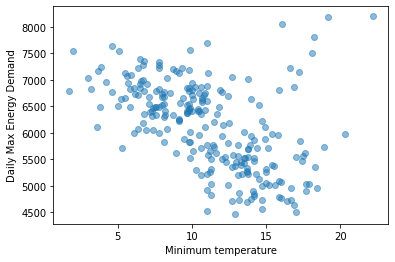

In [12]:
plt.scatter(x = df_new['Minimum temperature (°C)'], y = df_new['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Minimum temperature')
plt.ylabel('Daily Max Energy Demand')
plt.show()

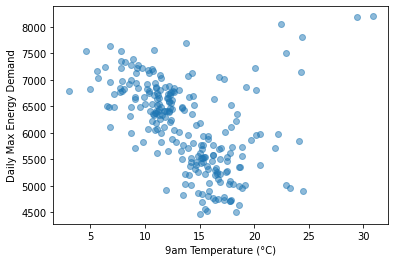

In [13]:
plt.scatter(x = df_new['9am Temperature (°C)'], y = df_new['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('9am Temperature (°C)')
plt.ylabel('Daily Max Energy Demand')
plt.show()

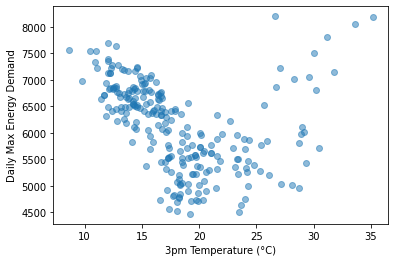

In [14]:
plt.scatter(x = df_new['3pm Temperature (°C)'], y = df_new['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('3pm Temperature (°C)')
plt.ylabel('Daily Max Energy Demand')
plt.show()

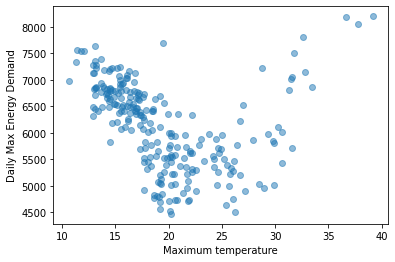

In [15]:
plt.scatter(x = df_new['Maximum temperature (°C)'], y = df_new['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Maximum temperature')
plt.ylabel('Daily Max Energy Demand')
plt.show()

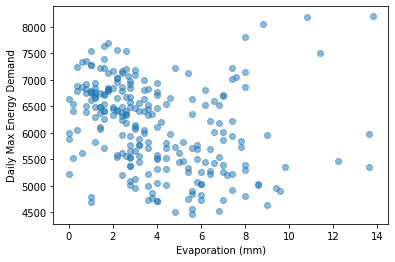

In [16]:
plt.scatter(x = df_new['Evaporation (mm)'], y = df_new['TOTALDEMAND'], alpha = 0.5)
plt.xlabel('Evaporation (mm)')
plt.ylabel('Daily Max Energy Demand')
plt.show()

### Predictive Modeling

In [17]:
# Select training set and testing test.
X = df_new[['Minimum temperature (°C)', '9am Temperature (°C)', '3pm Temperature (°C)']]
Y = df_new['TOTALDEMAND']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Calculate Mean Squared Error
MSE = mean_squared_error(Y_test, Y_pred)
r2_test = lm.score(X_test, Y_test)
MSE, r2_test

(413802.3598226621, 0.23600810807377814)

In [18]:
# Calculate intercept and coefficient of the prediction model 
intercept = model.intercept_
coefficient = model.coef_
intercept, coefficient

(7113.693265236545, array([-195.39325331,  117.9872405 ,  -20.54493045]))

In [19]:
# Prediction function 
 
Min_Temp = X['Minimum temperature (°C)'].values
Min_Temp = X['9am Temperature (°C)'].values
Temp_3pm = X['3pm Temperature (°C)'].values

Daily_Max_Demand = 7114 - 195.393*Min_Temp + 117.97*Min_Temp -20.545*Temp_3pm

Daily_Max_Demand

array([5050.1639    , 4720.4026    , 5214.3516    , 5485.8284    ,
       5408.4054    , 5565.3059    , 5174.6887    , 5199.3427    ,
       5087.4689    , 5071.1846    , 4114.5798    , 5253.2354    ,
       5200.1218    , 5405.5512    , 5503.2158    , 5526.5944    ,
       5558.191     , 5459.7473    , 5527.0701    , 5414.8723    ,
       5205.1616    , 5071.3569    , 5230.7876    , 4681.6705    ,
       4175.1323    , 5367.6394    , 5433.1905    , 5017.3125    ,
       5237.7508    , 5323.3918    , 5327.0251    , 5406.9783    ,
       5447.1169    , 5341.386     , 5174.6681    , 4715.9902    ,
       5187.0157    , 5556.4605    , 5502.8918    , 5326.8528    ,
       5200.9009    , 4579.2901    , 5311.2165    , 5365.2609    ,
       5339.3521    , 5325.274     , 4929.5964    , 5001.0282    ,
       4724.6633    , 4583.8748    , 4943.2194    , 5322.2887    ,
       5316.7526    , 5470.3438    , 5549.3456    , 5595.7788    ,
       5593.7449    , 5703.0885    , 5493.8535    , 5424.0417 

In [22]:
# Compare the prediction and actual demand
    
Demand_comp = pd.DataFrame(Daily_Max_Demand, columns = ['Prediction'])
Demand_comp['Actual'] = df_new['TOTALDEMAND']
Demand_comp.set_index(df_new['Date'], drop = False, inplace = True)

Demand_comp


,Prediction,Actual
0,5050.1639,NaN
1,4720.4026,NaN
2,5214.3516,NaN
3,5485.8284,NaN
4,5408.4054,NaN
...,...,...
238,6254.8669,NaN
239,6051.9677,NaN
240,6030.3402,NaN
241,5909.4487,NaN
